In [1]:
# Import the random module.
import random
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
from config import weather_api_key

In [2]:
# Import the requests library.
import requests

# Import the API key.
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
# Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | padang
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | warangal
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | avera
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | repelon
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | sinop
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | sabang
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | so

City not found. Skipping...
Processing Record 42 of Set 4 | brae
Processing Record 43 of Set 4 | gauting
Processing Record 44 of Set 4 | ekhabi
Processing Record 45 of Set 4 | toliary
City not found. Skipping...
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | victoria
Processing Record 48 of Set 4 | timra
Processing Record 49 of Set 4 | barpeta
Processing Record 50 of Set 4 | lushunkou
City not found. Skipping...
Processing Record 1 of Set 5 | zrece
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | prince rupert
Processing Record 6 of Set 5 | butaritari
Processing Record 7 of Set 5 | tooele
Processing Record 8 of Set 5 | krasnogorodsk
Processing Record 9 of Set 5 | guarda
Processing Record 10 of Set 5 | mpulungu
Processing Record 11 of Set 5 | henties bay
Processing Record 12 of Set 5 | ketchikan
Proce

Processing Record 28 of Set 8 | chapais
Processing Record 29 of Set 8 | xinzhi
Processing Record 30 of Set 8 | svetlogorsk
Processing Record 31 of Set 8 | klaksvik
Processing Record 32 of Set 8 | panaba
Processing Record 33 of Set 8 | kurilsk
Processing Record 34 of Set 8 | qorveh
Processing Record 35 of Set 8 | torzhok
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | goderich
Processing Record 38 of Set 8 | puerto suarez
Processing Record 39 of Set 8 | koutsouras
Processing Record 40 of Set 8 | santiago
Processing Record 41 of Set 8 | wagar
Processing Record 42 of Set 8 | jinxi
Processing Record 43 of Set 8 | aswan
Processing Record 44 of Set 8 | kungurtug
Processing Record 45 of Set 8 | tiksi
Processing Record 46 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 8 | tomatlan
Processing Record 48 of Set 8 | walvis bay
Processing Record 49 of Set 8 | evensk
Processing Record 50 of Set 8 | hokitika
Processing Record 1 of Set 9 | namibe
Proce

Processing Record 16 of Set 12 | corvallis
Processing Record 17 of Set 12 | we
City not found. Skipping...
Processing Record 18 of Set 12 | san patricio
Processing Record 19 of Set 12 | aksha
Processing Record 20 of Set 12 | stabat
Processing Record 21 of Set 12 | demba
Processing Record 22 of Set 12 | maningrida
Processing Record 23 of Set 12 | jishou
Processing Record 24 of Set 12 | pingdingshan
Processing Record 25 of Set 12 | marawi
Processing Record 26 of Set 12 | hihifo
City not found. Skipping...
Processing Record 27 of Set 12 | kovdor
Processing Record 28 of Set 12 | yantarnyy
Processing Record 29 of Set 12 | bull savanna
Processing Record 30 of Set 12 | tongliao
Processing Record 31 of Set 12 | lapeer
Processing Record 32 of Set 12 | ventspils
Processing Record 33 of Set 12 | agropoli
Processing Record 34 of Set 12 | karratha
Processing Record 35 of Set 12 | senanga
Processing Record 36 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 12 | shac

In [6]:
len(city_data)

560

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Padang,-0.9492,100.3543,80.65,76,96,2.55,ID,2022-01-31 02:17:44
1,Busselton,-33.6500,115.3333,73.09,44,99,17.45,AU,2022-01-31 02:17:45
2,Tuktoyaktuk,69.4541,-133.0374,-2.20,84,100,24.16,CA,2022-01-31 02:17:45
3,Dikson,73.5069,80.5464,-5.13,94,100,22.01,RU,2022-01-31 02:17:45
4,Saint-Philippe,-21.3585,55.7679,74.79,86,65,11.14,RE,2022-01-31 02:17:46
5,Hilo,19.7297,-155.0900,75.25,74,24,4.00,US,2022-01-31 02:17:06
6,Alofi,-19.0595,-169.9187,80.49,78,100,4.61,NU,2022-01-31 02:17:46
7,Warangal,18.0000,79.5833,62.71,33,0,1.72,IN,2022-01-31 02:17:47
8,East London,-33.0153,27.9116,73.20,85,100,13.20,ZA,2022-01-31 02:14:09
9,Avera,33.1940,-82.5271,49.51,73,0,7.87,US,2022-01-31 02:17:47


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Padang,ID,2022-01-31 02:17:44,-0.9492,100.3543,80.65,76,96,2.55
1,Busselton,AU,2022-01-31 02:17:45,-33.6500,115.3333,73.09,44,99,17.45
2,Tuktoyaktuk,CA,2022-01-31 02:17:45,69.4541,-133.0374,-2.20,84,100,24.16
3,Dikson,RU,2022-01-31 02:17:45,73.5069,80.5464,-5.13,94,100,22.01
4,Saint-Philippe,RE,2022-01-31 02:17:46,-21.3585,55.7679,74.79,86,65,11.14
5,Hilo,US,2022-01-31 02:17:06,19.7297,-155.0900,75.25,74,24,4.00
6,Alofi,NU,2022-01-31 02:17:46,-19.0595,-169.9187,80.49,78,100,4.61
7,Warangal,IN,2022-01-31 02:17:47,18.0000,79.5833,62.71,33,0,1.72
8,East London,ZA,2022-01-31 02:14:09,-33.0153,27.9116,73.20,85,100,13.20
9,Avera,US,2022-01-31 02:17:47,33.1940,-82.5271,49.51,73,0,7.87


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/30/22'

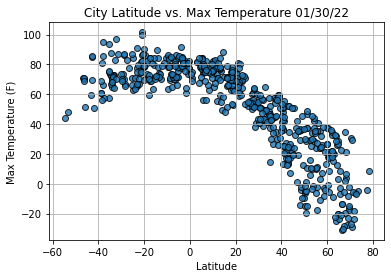

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

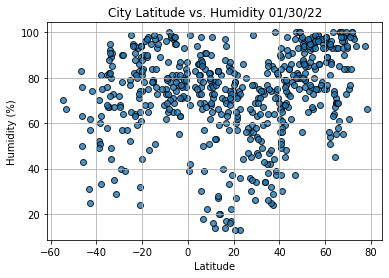

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

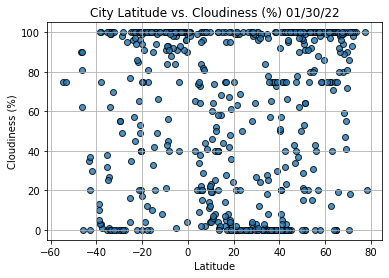

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

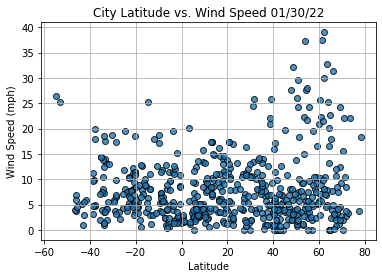

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                        Ancud
Country                        CL
Date          2022-01-31 02:17:48
Lat                      -41.8697
Lng                      -73.8203
Max Temp                    50.43
Humidity                       74
Cloudiness                     30
Wind Speed                   5.95
Name: 13, dtype: object

In [22]:
#for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Tuktoyaktuk,CA,2022-01-31 02:17:45,69.4541,-133.0374,-2.20,84,100,24.16
3,Dikson,RU,2022-01-31 02:17:45,73.5069,80.5464,-5.13,94,100,22.01
5,Hilo,US,2022-01-31 02:17:06,19.7297,-155.0900,75.25,74,24,4.00
7,Warangal,IN,2022-01-31 02:17:47,18.0000,79.5833,62.71,33,0,1.72
9,Avera,US,2022-01-31 02:17:47,33.1940,-82.5271,49.51,73,0,7.87


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

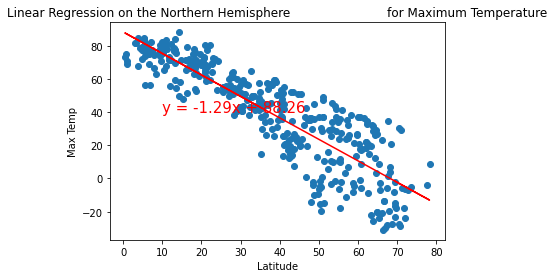

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

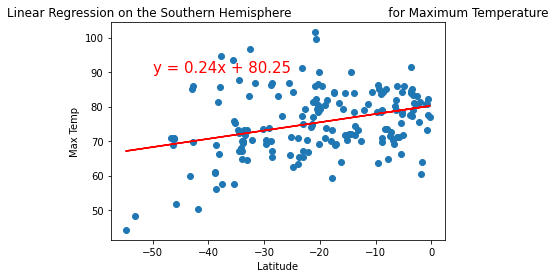

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

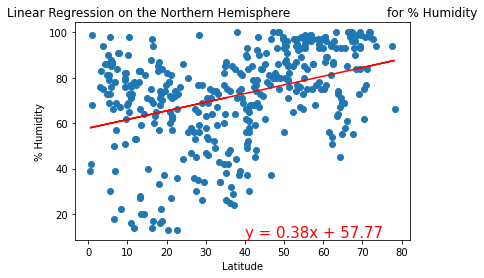

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

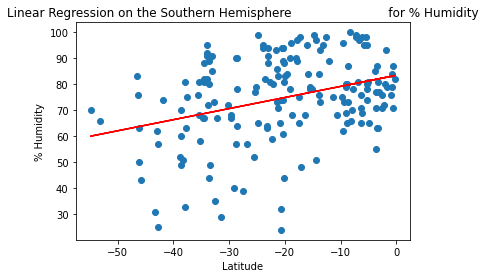

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

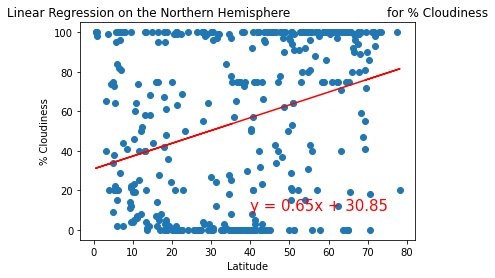

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

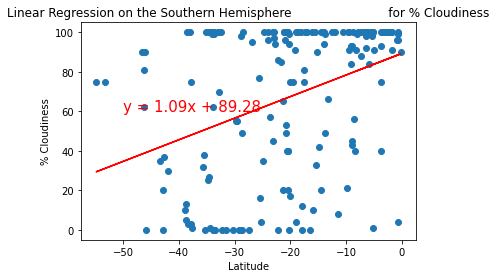

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

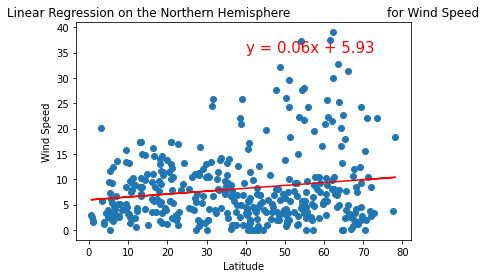

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

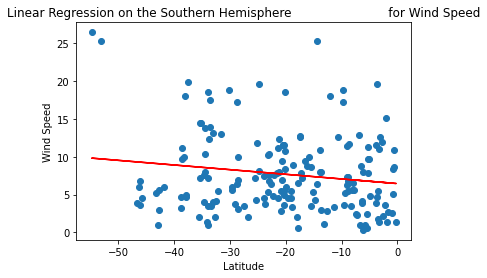

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))